# Introduction Notebook for usage of BEC in a JupyterNotebook
To start a BEC client within a jupyter notebook environment, you can simply run the following command.
``` ipython
from bec_jupyter.main import Main
Main.run()
```
This will start the BEC client. Note, the BEC server needs to run and be reachable from the system you are running the JupyterLab session.

In [1]:
from bec_jupyter.main import Main
Main.run() #Start BEC CLient

 | 2024-04-30 16:24:17 | [INFO] | Unable to import `pandas` optional dependency


Waiting for GUI to start...


 | 2024-04-30 16:24:18 | [INFO] | Unable to import `pandas` optional dependency


Waiting for GUI to start...
Waiting for GUI to start...


BECClient | 2024-04-30 16:24:20 | [INFO] | Waiting for ScanServer.
BECClient | 2024-04-30 16:24:20 | [SUCCESS] | ScanServer is running.
BECClient | 2024-04-30 16:24:20 | [INFO] | Waiting for ScanBundler.
BECClient | 2024-04-30 16:24:20 | [SUCCESS] | ScanBundler is running.
BECClient | 2024-04-30 16:24:20 | [INFO] | Waiting for DeviceServer.
BECClient | 2024-04-30 16:24:21 | [SUCCESS] | DeviceServer is running.
BECClient | 2024-04-30 16:24:21 | [INFO] | Waiting for SciHub.
BECClient | 2024-04-30 16:24:21 | [SUCCESS] | SciHub is running.
BECClient | 2024-04-30 16:24:21 | [SUCCESS] | All BEC services are running.


BECClient | 2024-04-30 16:24:21 | [SUCCESS] | Loading plugin: csaxs_bec


Importing user defined packages
-------------------
Importing module: plt.
Importing module: np.
Importing module: interact.
-------------------


qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1157.56,433.38 gbl=1157.56,433.38 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1157.56,-433.38 last=-1157.56,-433.38 Δ 1157.56,433.38) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1327.24,452.485 gbl=1327.24,452.485 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1327.24,-452.485 last=-1327.24,-452.485 Δ 1327.24,452.485) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1265.89,450.032 gbl=1265.89,450.032 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1265.89,-450.032 last=-1265.89,-450.032 Δ 1265.89,450.032) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1201.89,366.814 gbl=1201.89,366.814 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1201.89,-366.814 last=-1201.89,-366.814 Δ 1201.89,366.814) : no target window


## Importing of additional packages
Within main, we also specify a function `import_user_modules` within `main`. 
As you see above, some additional packages have been imported. Obviously you may still import additional packages here, or add your own imports to the function which will make them available for usage in the jupyter notebook.
The following imports are currently defined per default:
``` ipython
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
```
These packages are now in the namespace of the current notebook (`np`, `interact` and `plt`). 
Please check the respective docs for more insights on their usage. 

In [2]:
np.random.rand(10)

NameError: name 'fig' is not defined

## BEC specific namespace
We have also imported and filled the namespace of this notebook:
- `bec`   : Access all BEC related submodules, example: `bec.config` 
- `dev`   : Access all devices currently loaded in the config, example: `dev.<devname>`
- `scans` : Access all scans that are available on the scan server, example: `scans.line_scan`
``` 

In [3]:
# Load/Reload demo config 
bec.config.load_demo_config()

A recovery config was written to /Users/appel_c/work_psi_awi/bec_workspace/bec_jupyter/bec_jupyter/notebooks/device_configs/recovery_configs/recovery_config_2024-04-30_16-23-06.yaml.


In [4]:
# Print out object samx
dev.bpm4i

Device(name=bpm4i, enabled=True):
--------------------
Details:
	Description: bpm4i
	Status: enabled
	Read only: False
	Software Trigger: False
	Last recorded value: {'bpm4i': {'value': 109, 'timestamp': 1714486987.187376}}
	Device class: ophyd_devices.SimMonitor
	readoutPriority: monitored
	Device tags: ['beamline']
	User parameter: None
--------------------
Config:


## Some examples
Below are a range of example that are supposed to give users insights on how to interact with BEC.
We provide a set of examples, but you can easily continue and explore BEC further on your own.

### Configure the readback from a simulated monitor

In [5]:
print(dev.bpm4i.sim.sim_get_models())
dev.bpm4i.sim.sim_select_model("GaussianModel")

['BreitWignerModel', 'ConstantModel', 'DampedHarmonicOscillatorModel', 'DampedOscillatorModel', 'DoniachModel', 'ExponentialGaussianModel', 'ExponentialModel', 'GaussianModel', 'LinearModel', 'LognormalModel', 'LorentzianModel', 'MoffatModel', 'ParabolicModel', 'Pearson4Model', 'Pearson7Model', 'PolynomialModel', 'PowerLawModel', 'PseudoVoigtModel', 'QuadraticModel', 'RectangleModel', 'SineModel', 'SkewedGaussianModel', 'SkewedVoigtModel', 'SplitLorentzianModel', 'StepModel', 'StudentsTModel', 'ThermalDistributionModel', 'VoigtModel']
+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                 Currently active model: Model(gaussian)                                                  |
+--------------------------------------------------+----------------------------------+----------------------------------------------------+
|                    Parameter      

In [6]:
print(dev.bpm4i.sim.sim_params)
dev.bpm4i.sim.sim_params = {"amplitude" : 1000}
print(dev.bpm4i.sim.sim_params)

{'amplitude': 100, 'center': 0, 'sigma': 1, 'fwhm': 2.35482, 'height': 39.89423, 'noise': 'uniform', 'noise_multiplier': 10, 'ref_motor': 'samx'}
{'amplitude': 1000, 'center': 0, 'sigma': 1, 'fwhm': 2.35482, 'height': 39.89423, 'noise': 'uniform', 'noise_multiplier': 10, 'ref_motor': 'samx'}


### Perform a scan, and fit the output
In the following, we will first do a scan and fit the data afterwards.
First we gonna do a `line_scan` and assign the scan_report to the variable `s`. 
A scan always returns a scan report, and the example below is a convenient way to reuse the information from the scan.
Note, you can always recover the same information also from the `bec.history[-1].scans[0]`
This will not be covered in this example

In [7]:
s = scans.line_scan(dev.samx,-5,5,steps=100,relative=False)

Output()

In `bec.dap`, we provide the possibility to load different data processing tools. 
BEC already comes with a set of models provided by the [lmfit](https://lmfit.github.io/lmfit-py/builtin_models.html) package. 
Here, we use for instance the GaussianModel to fit now the data from `bpm4i` vs the scanning motor `samx`, which we configured before (see above).

In [8]:
fit_report = bec.dap.GaussianModel.fit(s, "samx", "samx", "bpm4i", "bpm4i")

#### Plot using BECWidgets

fig

#### Plot using matplotlib
You can also use any other plotting backend. As you may remember, we imported matplotlib above which allows you to use matplotlit to plot your data. For further insights on matplotlib, please visit their [docs](https://matplotlib.org/stable/users/index).

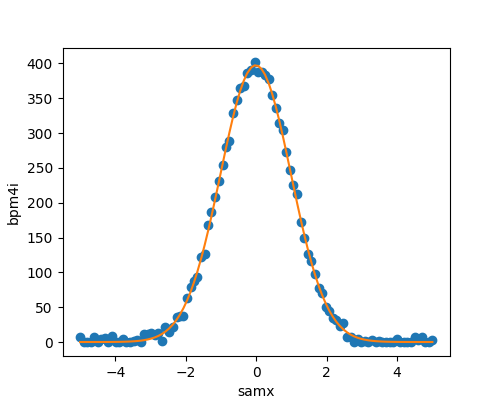

In [10]:
fig_mpl, ax = plt.subplots(1,1, figsize=(5,4))

ax.plot(s.scan.data.samx.samx.val, s.scan.data.bpm4i.bpm4i.val, 'o')
ax.plot(fit_report.data['x'], fit_report.data['y'])
ax.set_xlabel('samx')
ax.set_ylabel('bpm4i');

#### Adding ipywidget
A commonly used package is [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/), which allows you to quickly quickly make simple interactive plotting applications. Below, we simply provide an example for [interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html). We note that we do not guarantee the functionality of this package, since dependendies may create caviats that can prohibit proper functionality of the interactive capabilities.

interactive(children=(FloatSlider(value=0.0, description='value', max=5.0, min=-5.0, step=0.2), Output()), _dom_classes=('widget-interact',))

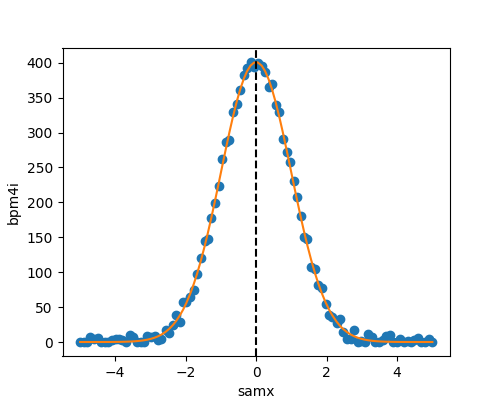

In [14]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.plot(s.scan.data.samx.samx.val, s.scan.data.bpm4i.bpm4i.val, 'o')
ax.plot(fit_report.data['x'], fit_report.data['y'])
ax.set_xlabel('samx')
ax.set_ylabel('bpm4i')

@interact(value=(-5, 5, 0.2))
def plot(value):
    ax.clear()
    ax.plot(s.scan.data.samx.samx.val, s.scan.data.bpm4i.bpm4i.val, 'o')
    ax.plot(fit_report.data['x'], fit_report.data['y'])
    ax.set_xlabel('samx')
    ax.set_ylabel('bpm4i')
    ax.axvline(value, color='black', ls='--')
    
    